<a href="https://colab.research.google.com/github/mheuristicsApps/An-overview-of-fundamentals-and-applications-of-Particle-Swarm-Optimization/blob/main/PSO_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

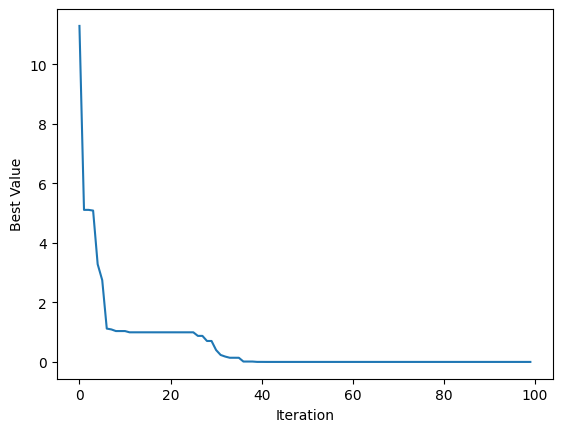

Best Position: [1.17791858e-10 9.19350054e-10]
Best Value: 0.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class HybridPSO:
    def __init__(self, n_particles, n_dimensions, objective_function, learning_rate, max_iterations):
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.objective_function = objective_function
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        
        self.global_best_position = np.random.uniform(low=-5.12, high=5.12, size=n_dimensions)
        self.global_best_value = self.objective_function(self.global_best_position)
        
        self.positions = np.random.uniform(low=-5.12, high=5.12, size=(n_particles, n_dimensions))
        self.velocities = np.zeros((n_particles, n_dimensions))
        self.personal_best_positions = self.positions.copy()
        self.personal_best_values = self.objective_function(self.positions.T)
        
    def optimize(self):
        iteration = 0
        best_values = []
        
        while iteration < self.max_iterations:
            # Update velocity
            cognitive_component = np.random.uniform() * (self.personal_best_positions - self.positions)
            social_component = np.random.uniform() * (self.global_best_position - self.positions)
            self.velocities = 0.5 * self.velocities + cognitive_component + social_component
            
            # Update position
            self.positions = self.positions + self.velocities
            
            # Clip positions to search space
            self.positions = np.clip(self.positions, -5.12, 5.12)
            
            # Update personal best positions
            current_values = self.objective_function(self.positions.T)
            mask = current_values < self.personal_best_values
            self.personal_best_values[mask] = current_values[mask]
            self.personal_best_positions[mask] = self.positions[mask]
            
            # Update global best position
            mask = current_values < self.global_best_value
            if np.any(mask):
                self.global_best_value = np.min(current_values)
                self.global_best_position = self.positions[np.argmin(current_values)]
            
            # Perform gradient-based optimization on global best position
            gradient = self.objective_function.gradient(self.global_best_position)
            self.global_best_position = self.global_best_position - self.learning_rate * gradient
            
            # Update iteration and best values
            iteration += 1
            best_values.append(self.global_best_value)
        
        return self.global_best_position, self.global_best_value, best_values

# Test the algorithm with the Rastrigin function
class Rastrigin:
    def __init__(self, n_dimensions):
        self.n_dimensions = n_dimensions
        
    def __call__(self, x):
        return 10 * self.n_dimensions + np.sum(x**2 - 10 * np.cos(2 * np.pi * x), axis=0)
    
    def gradient(self, x):
        return 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)
    
n_particles = 50
n_dimensions = 2
objective_function = Rastrigin(n_dimensions)
learning_rate = 0.005
max_iterations = 100

pso = HybridPSO(n_particles, n_dimensions, objective_function, learning_rate, max_iterations)
best_position, best_value, best_values = pso.optimize()

# Plot convergence curve
plt.plot(best_values)
plt.xlabel('Iteration')
plt.ylabel('Best Value')
plt.show()

# Print results
print('Best Position:', best_position)
print('Best Value:', best_value)
